In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import datetime, pytz
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib as mpl

In [2]:
# Here We Convert Minutely Data to Daily Form 

def dateparse (time_in_secs):    
    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

## Reading Data and Preparation

In [3]:
df = pd.read_csv("data.csv",parse_dates=[0], date_parser=dateparse)

In [4]:
df2 = pd.read_csv("btc_new_data.csv")
df2.Date = pd.to_datetime(df2.Date)
df2         = df2.set_index(['Date'])

In [5]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 09:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 09:53:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 09:54:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 09:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 09:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

Timestamp                  0
Open                 1241716
High                 1241716
Low                  1241716
Close                1241716
Volume_(BTC)         1241716
Volume_(Currency)    1241716
Weighted_Price       1241716
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['Timestamp'], format="%Y-%d-%m %H:%M")
df['date'] = pd.to_datetime(df['date'])
df         = df.set_index(['date'])

In [8]:
df.Low[df.Low==1.5]     = 540   # wrong data 
df.Close[df.Close==1.5] = 540   # wrong data
df.fillna(method='ffill', inplace = True)

<ipython-input-8-82d0bddccae1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Low[df.Low==1.5]     = 540   # wrong data
<ipython-input-8-82d0bddccae1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Close[df.Close==1.5] = 540   # wrong data


In [9]:
# Close 

df_Close = df[["Close"]]
df_Close = df_Close.resample('D')[['Close']].last()



In [10]:
df_Close.head()

,Close
date,
2011-12-31 00:00:00+00:00,4.58
2012-01-01 00:00:00+00:00,4.84
2012-01-02 00:00:00+00:00,5.00
2012-01-03 00:00:00+00:00,5.29
2012-01-04 00:00:00+00:00,5.57


We took these periods to examine in this file. These Periods represent increasment periods. We didn't examine bear market because for us corrections which are in bull market, are important.

2011-12-30 : 2013-04-16 --> Increasment Periods

2015-01-14 : 2017-12-16 --> Increasment Periods

2018-12-16 : 2019-06-26 --> Increasment Periods

2020-03-12 : 2020-09-14 --> Increasment Periods

In [11]:
firstInc  = df_Close.loc["2012-11-28" : "2013-12-2"]
secondInc = df_Close.loc["2016-08-6" : "2017-12-16"]

In [12]:
thirdInc = df2[["Close"]]
thirdInc = thirdInc.loc["2020-05-4" : "2021-03-16"]

In [13]:
firstInc.head()

,Close
date,
2012-11-28 00:00:00+00:00,12.24
2012-11-29 00:00:00+00:00,12.10
2012-11-30 00:00:00+00:00,12.38
2012-12-01 00:00:00+00:00,12.44
2012-12-02 00:00:00+00:00,12.38


In [14]:
secondInc.head()

,Close
date,
2016-08-06 00:00:00+00:00,582.89
2016-08-07 00:00:00+00:00,587.65
2016-08-08 00:00:00+00:00,592.17
2016-08-09 00:00:00+00:00,584.80
2016-08-10 00:00:00+00:00,593.29


In [15]:
thirdInc.head()

,Close
Date,
2020-05-04,8912.654297
2020-05-05,9003.070313
2020-05-06,9268.761719
2020-05-07,9951.518555
2020-05-08,9842.666016


## Acceleration of BTC

In [16]:
sayac = 0
firstInc["Acceleration"] = ""
firstInc["Acceleration"][0] = 0
firstInc["Bigger_10"] = 0

for i in range (len(firstInc["Close"])):
    if sayac == 0:
        pass
        sayac += 1
        firstInc["Acceleration"][0] = 0 
    else: 
        
        temp_cal = (((firstInc["Close"][i] / firstInc["Close"][i - 1]) - 1)*100)                   
        firstInc["Acceleration"][i] = temp_cal 
        if temp_cal > 9.9:
            firstInc["Bigger_10"][i] = temp_cal
        
        
            
        
firstInc["Acceleration"] = firstInc.Acceleration.astype(float)        
      
           

<ipython-input-16-cebf454e4a8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstInc["Acceleration"] = ""
<ipython-input-16-cebf454e4a8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstInc["Acceleration"][0] = 0
/home/hakan/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_g

[None]

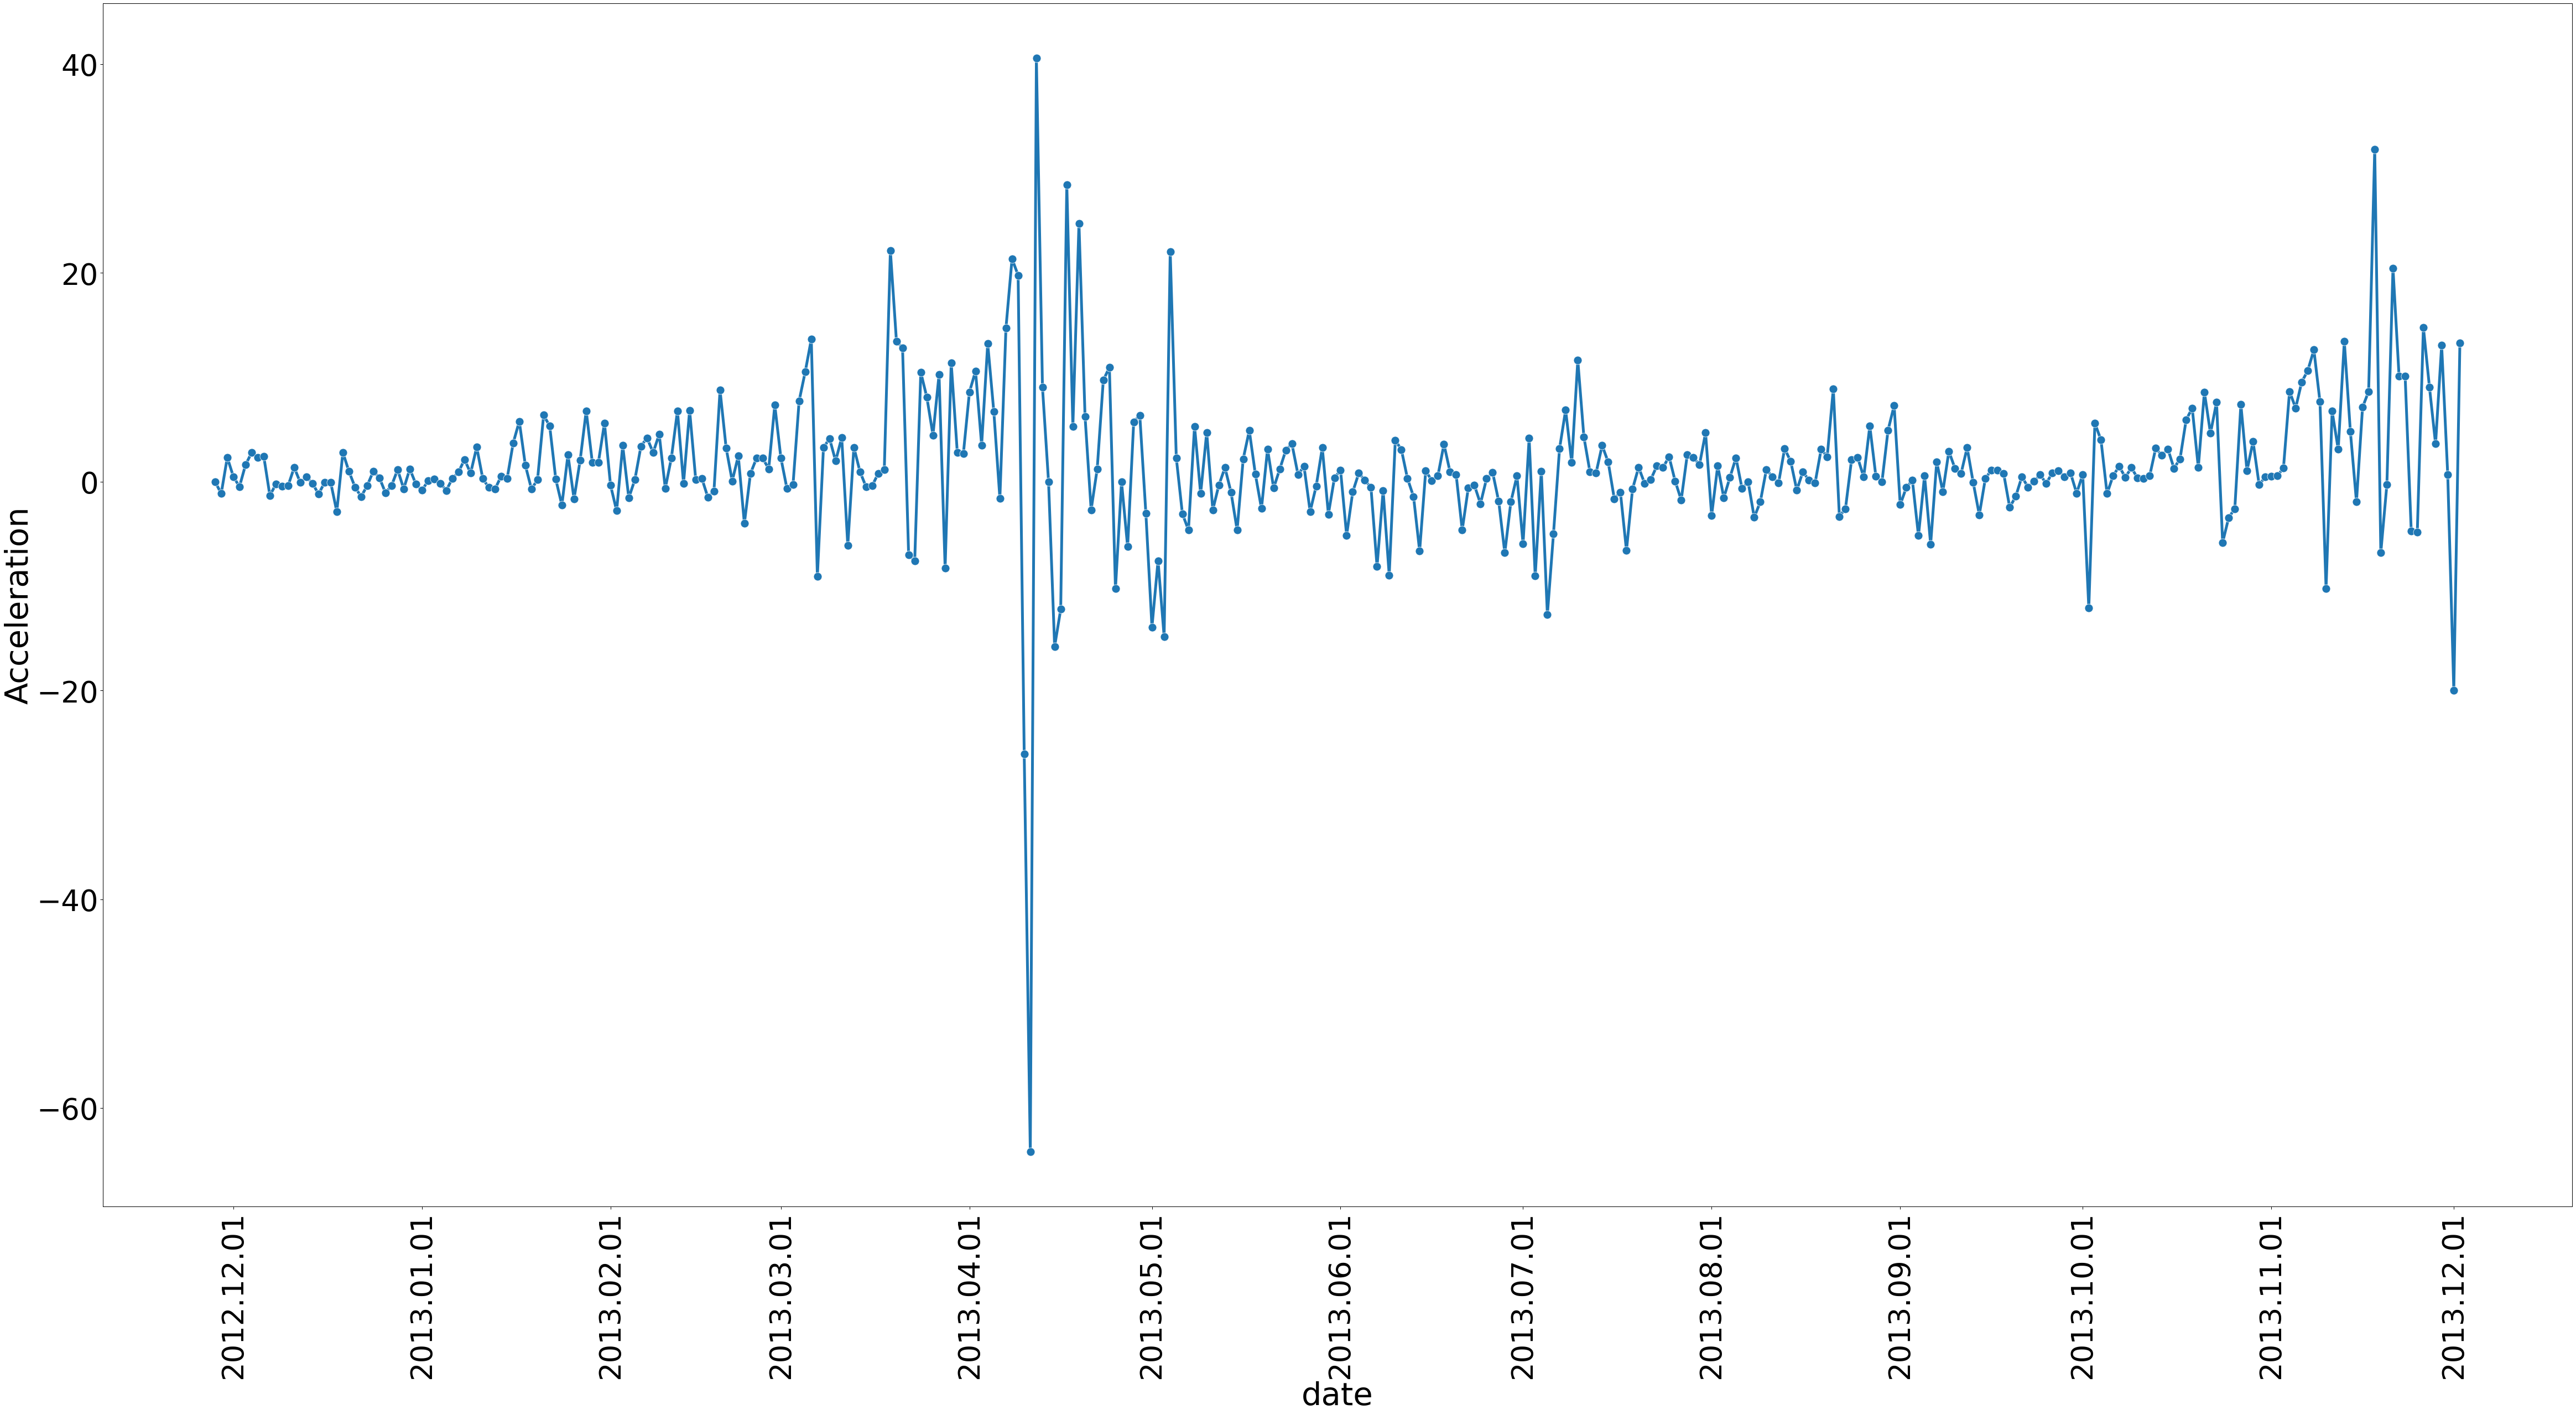

In [17]:
                                   
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 15}                  
sns.set_context("paper", rc = paper_rc , font_scale = 6) 

plt.subplots(figsize=(80,40))
plt.xticks(rotation=90)

line = sns.lineplot(data=firstInc, x=firstInc.index, y="Acceleration", marker="o")


line.xaxis.set_major_locator(mdates.AutoDateLocator())
line.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
months = mdates.MonthLocator()  # every month
line.xaxis.set_major_locator(months)

lw = line.lines[0].get_linewidth() # lw of first line
plt.setp(line.lines,linewidth=lw)  # set lw for all lines of g axes


[None]

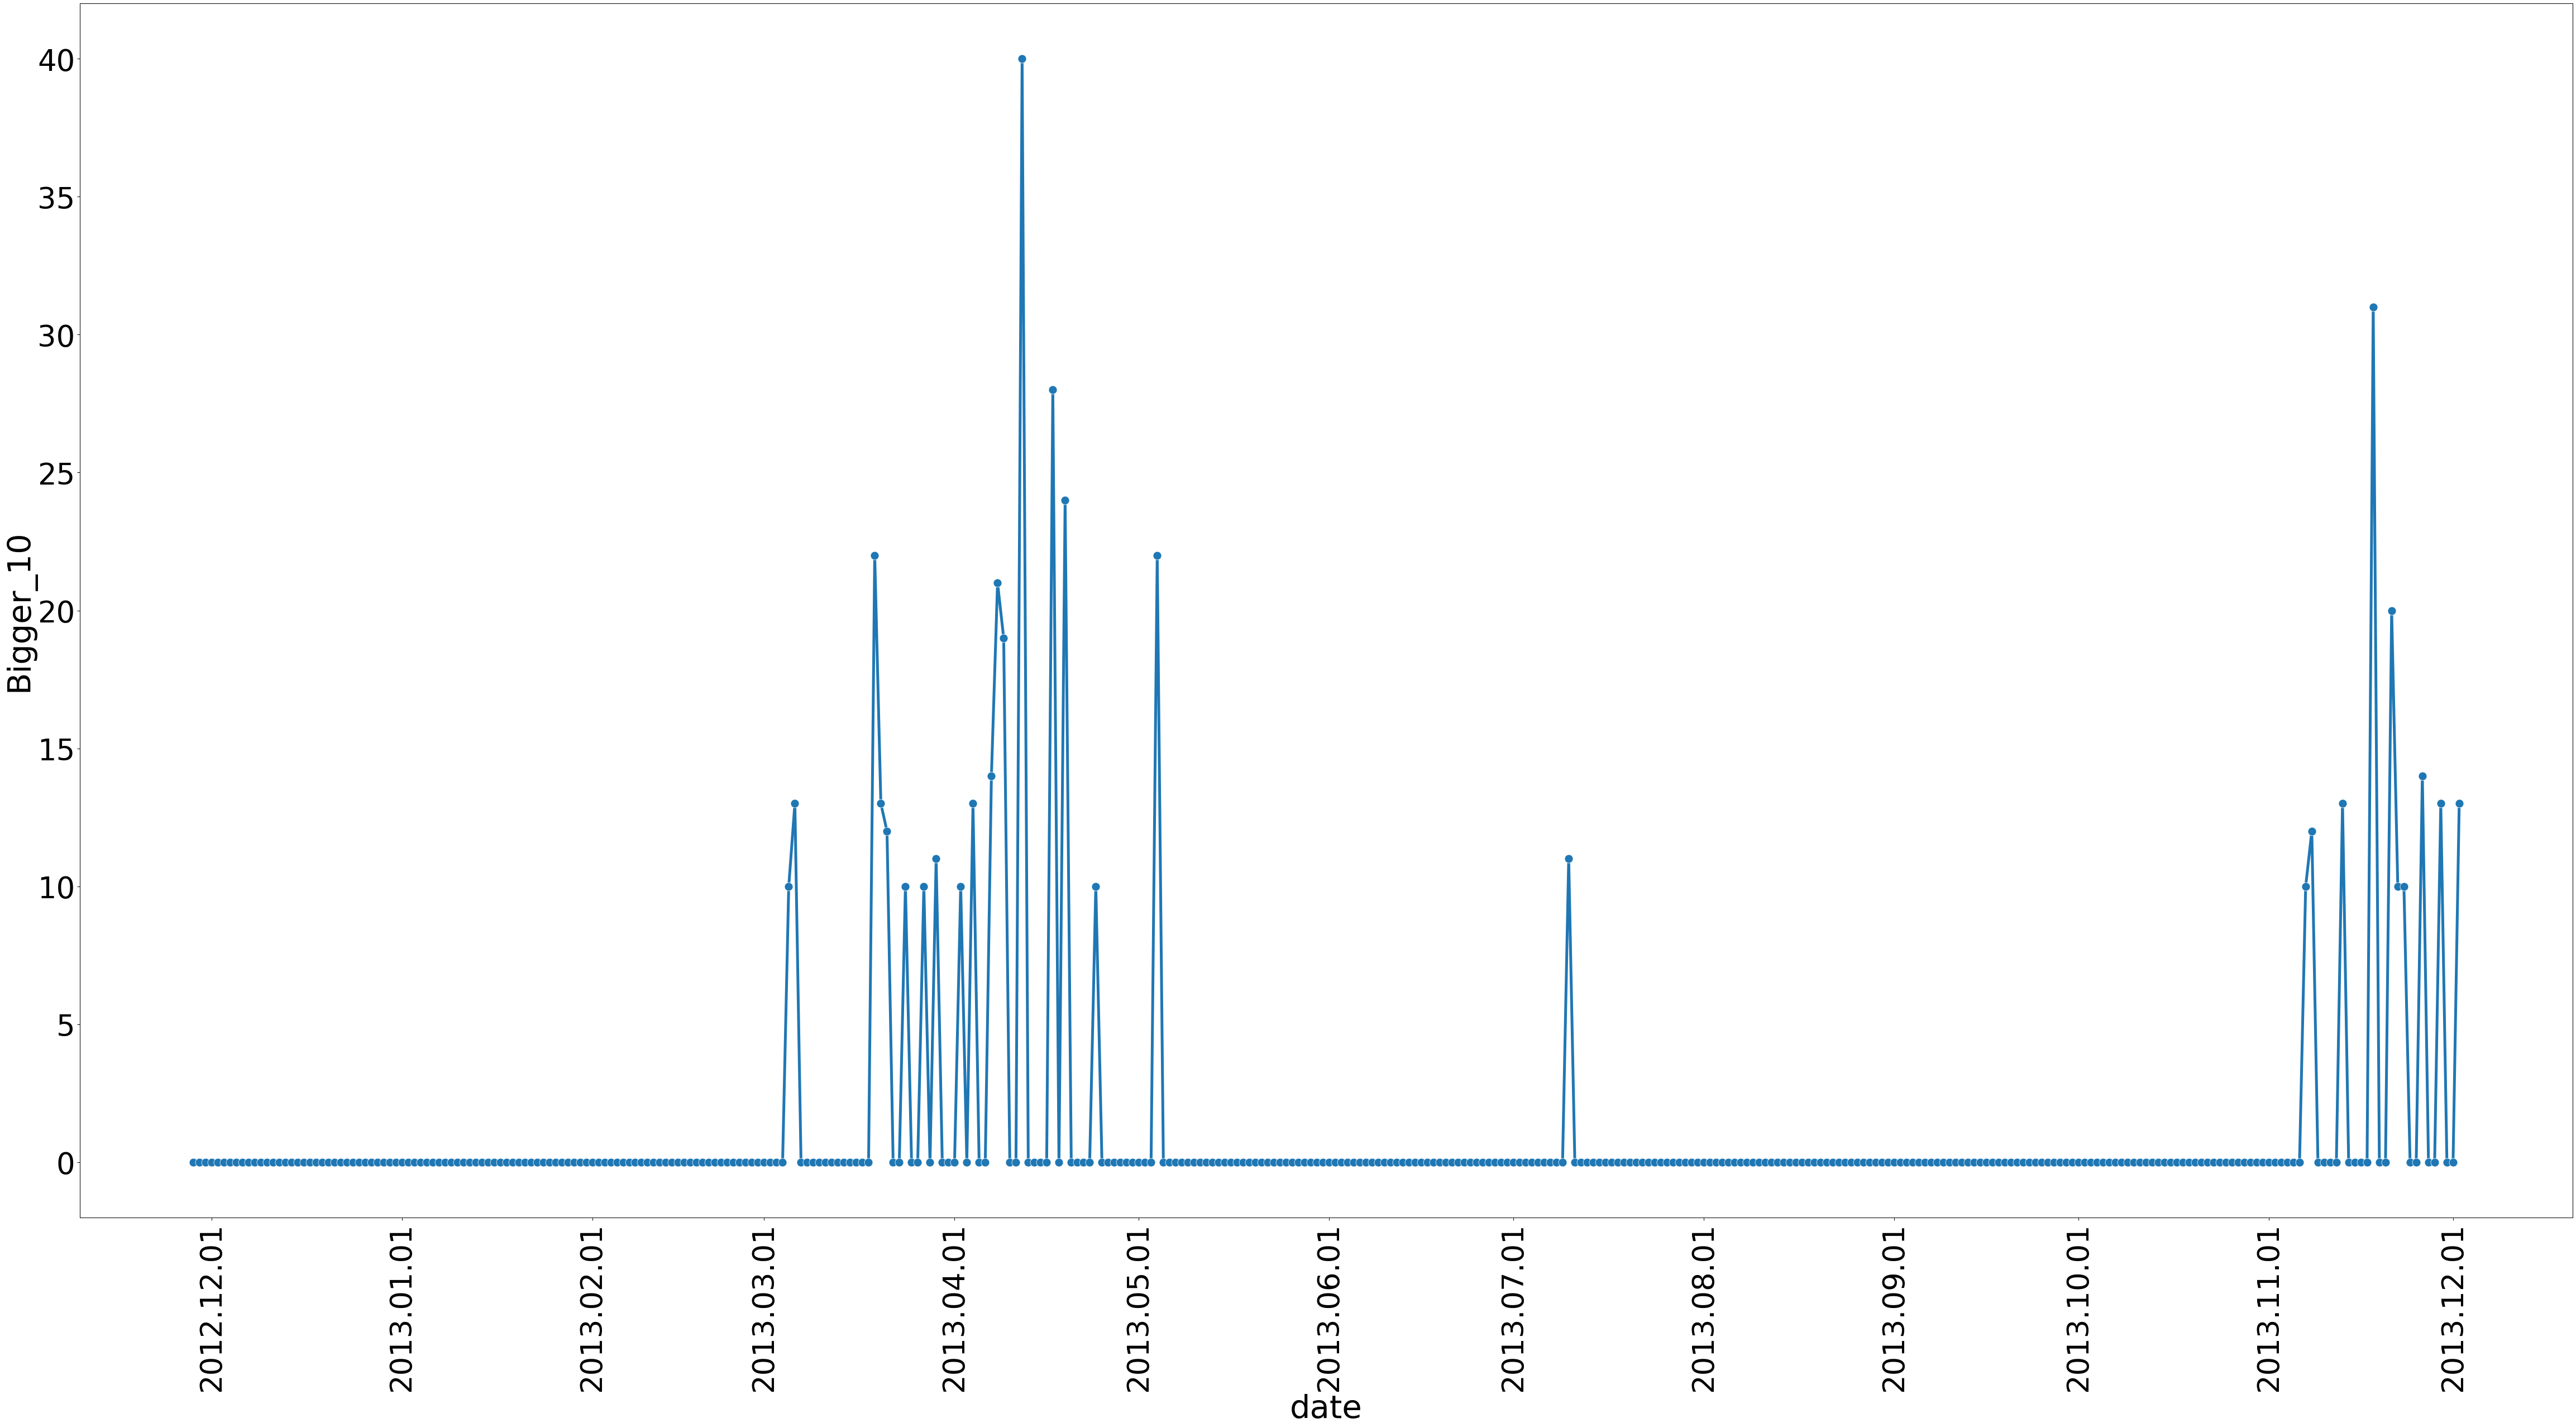

In [18]:
                                   
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 15}                  
sns.set_context("paper", rc = paper_rc , font_scale = 6) 

plt.subplots(figsize=(80,40))
plt.xticks(rotation=90)

line = sns.lineplot(data=firstInc, x=firstInc.index, y="Bigger_10", marker="o")


line.xaxis.set_major_locator(mdates.AutoDateLocator())
line.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
months = mdates.MonthLocator()  # every month
line.xaxis.set_major_locator(months)

lw = line.lines[0].get_linewidth() # lw of first line
plt.setp(line.lines,linewidth=lw)  # set lw for all lines of g axes


In [19]:
sayac = 0
secondInc["Acceleration"] = ""
secondInc["Acceleration"][0] = 0
secondInc["Bigger_10"] = 0

for i in range (len(secondInc["Close"])):
    if sayac == 0:
        pass
        sayac += 1
        secondInc["Acceleration"][0] = 0 
    else: 
        
        temp_cal = (((secondInc["Close"][i] / secondInc["Close"][i - 1]) - 1)*100)                   
        secondInc["Acceleration"][i] = temp_cal
        if temp_cal > 9.9:
            secondInc["Bigger_10"][i] = temp_cal
        
            
        
secondInc["Acceleration"] = secondInc.Acceleration.astype(float)        
      
           

<ipython-input-19-5d3b238d61e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondInc["Acceleration"] = ""
<ipython-input-19-5d3b238d61e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondInc["Acceleration"][0] = 0
/home/hakan/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user

[None]

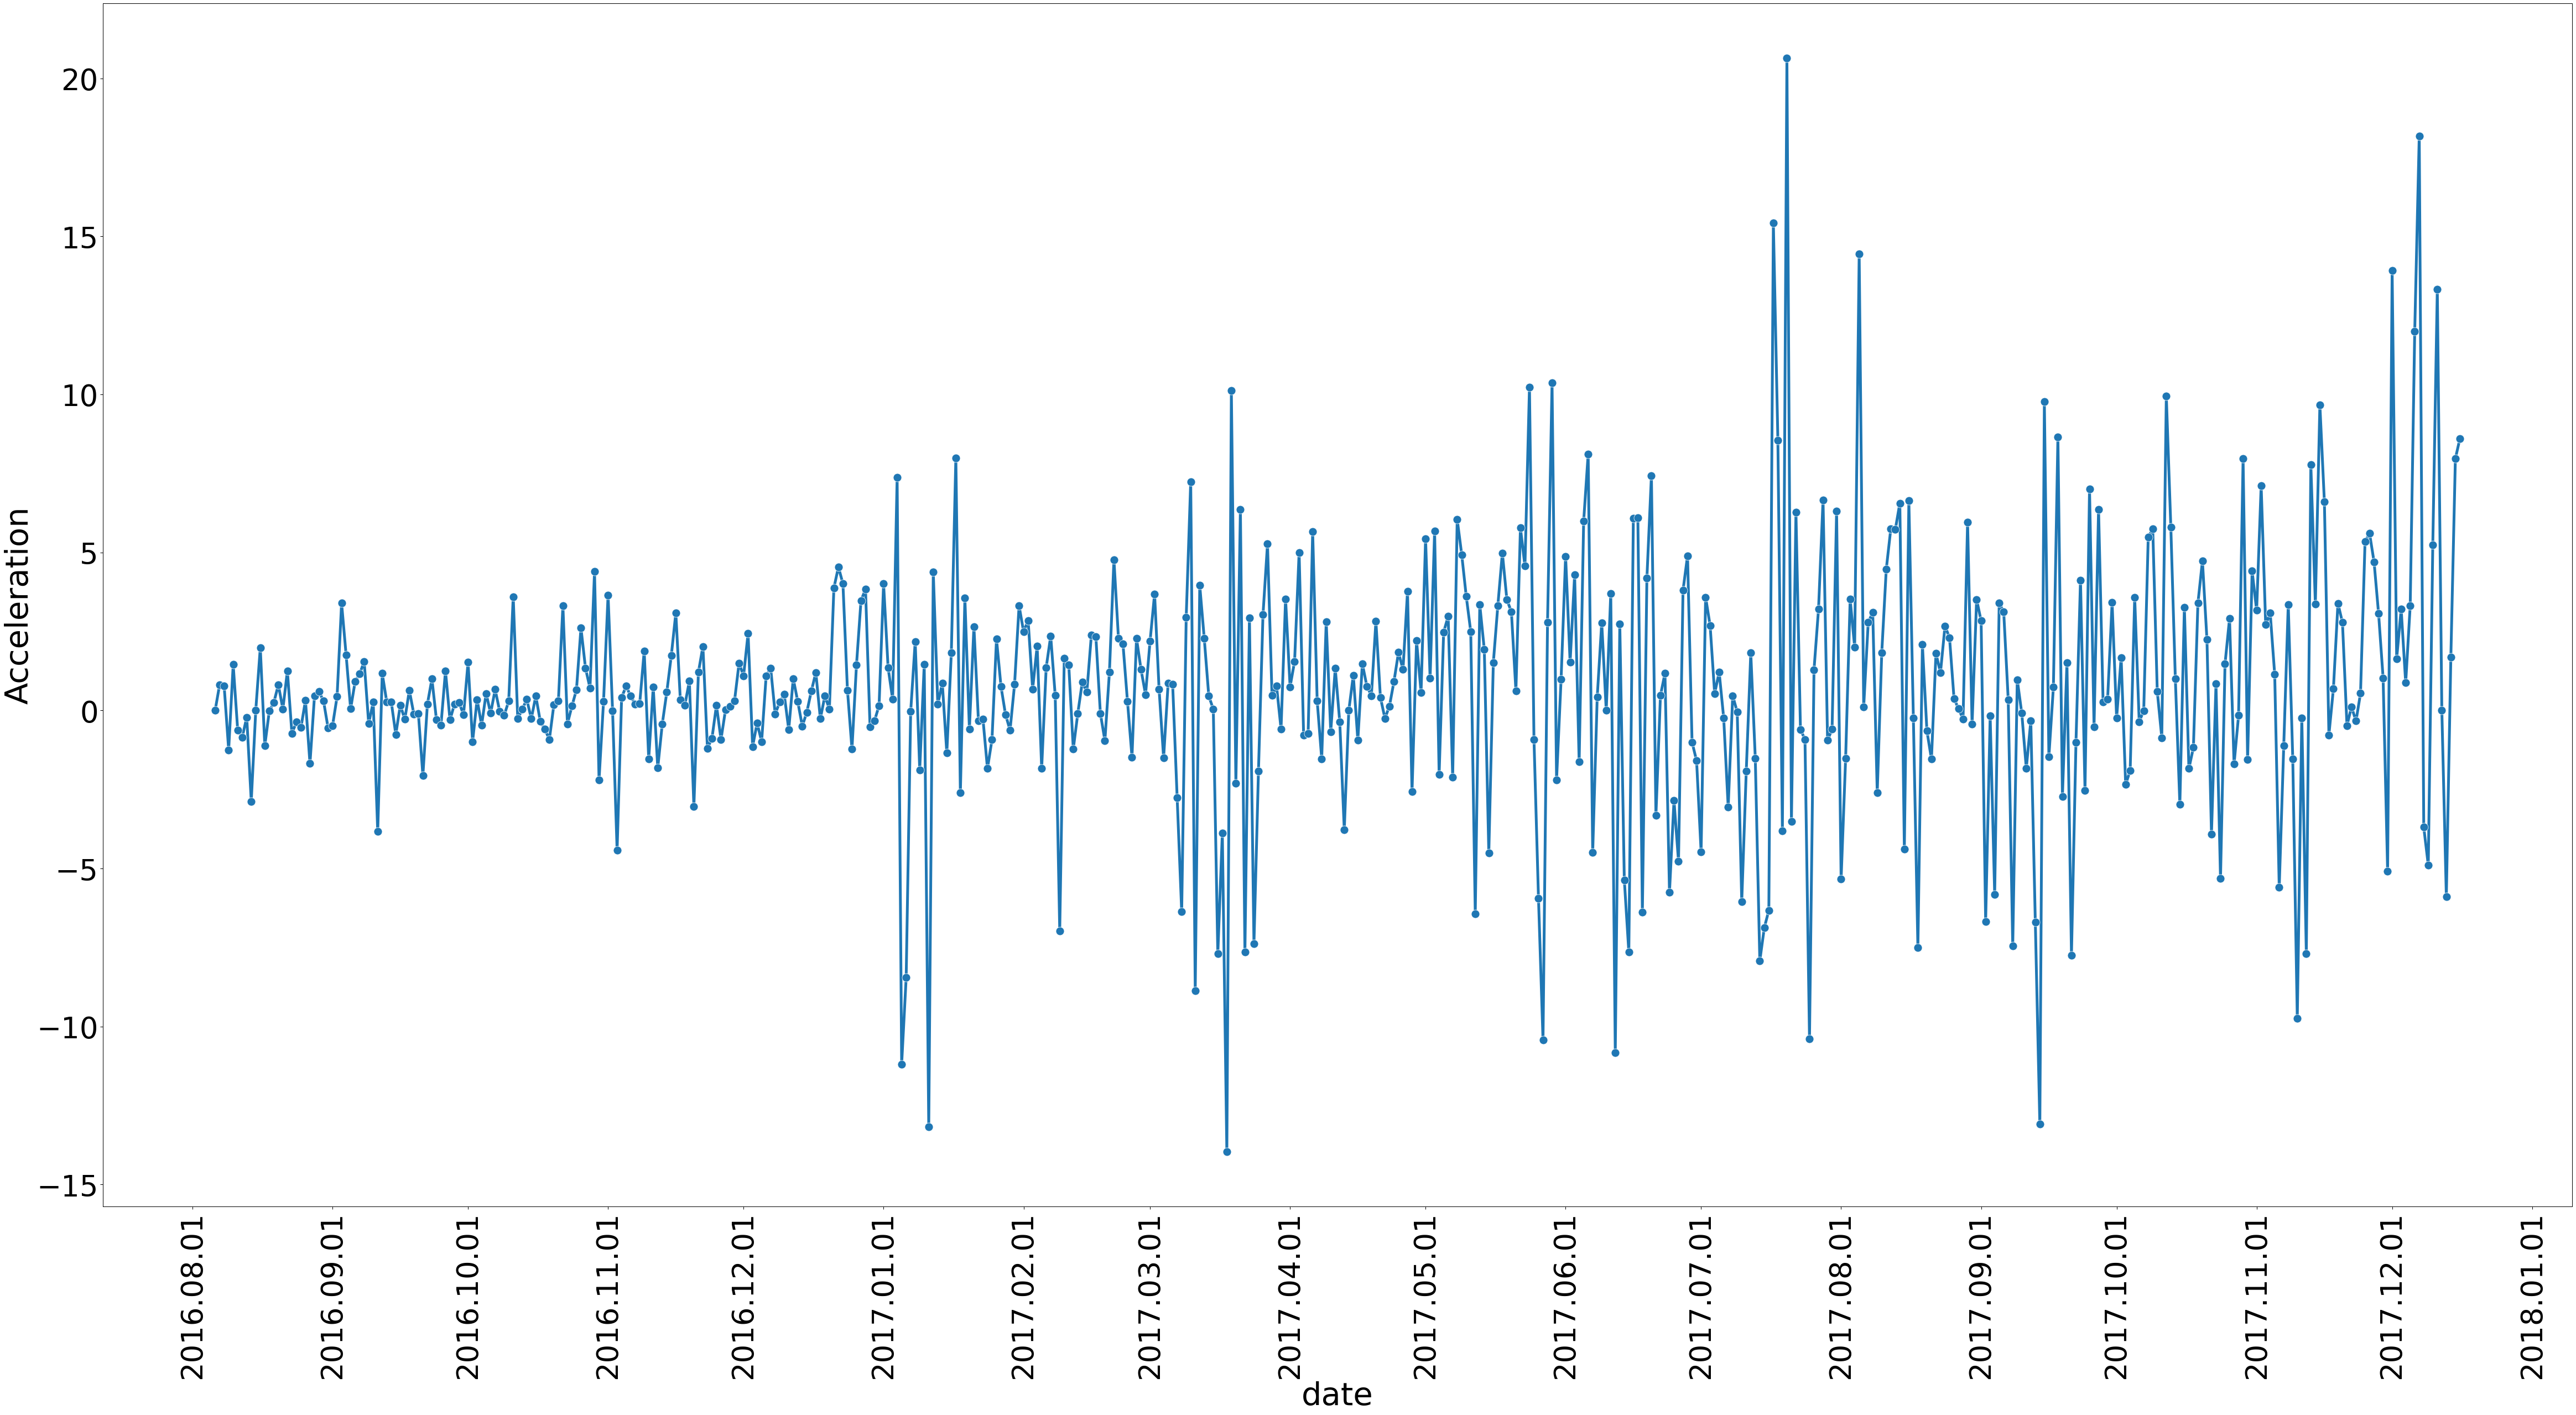

In [20]:
                                   
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 15}                  
sns.set_context("paper", rc = paper_rc , font_scale = 6) 

plt.subplots(figsize=(80,40))
plt.xticks(rotation=90)
line = sns.lineplot(data=secondInc, x=secondInc.index, y="Acceleration", marker="o")


line.xaxis.set_major_locator(mdates.AutoDateLocator())
line.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
months = mdates.MonthLocator()  # every month
line.xaxis.set_major_locator(months)

lw = line.lines[0].get_linewidth() # lw of first line
plt.setp(line.lines,linewidth=lw)  # set lw for all lines of g axes


[None]

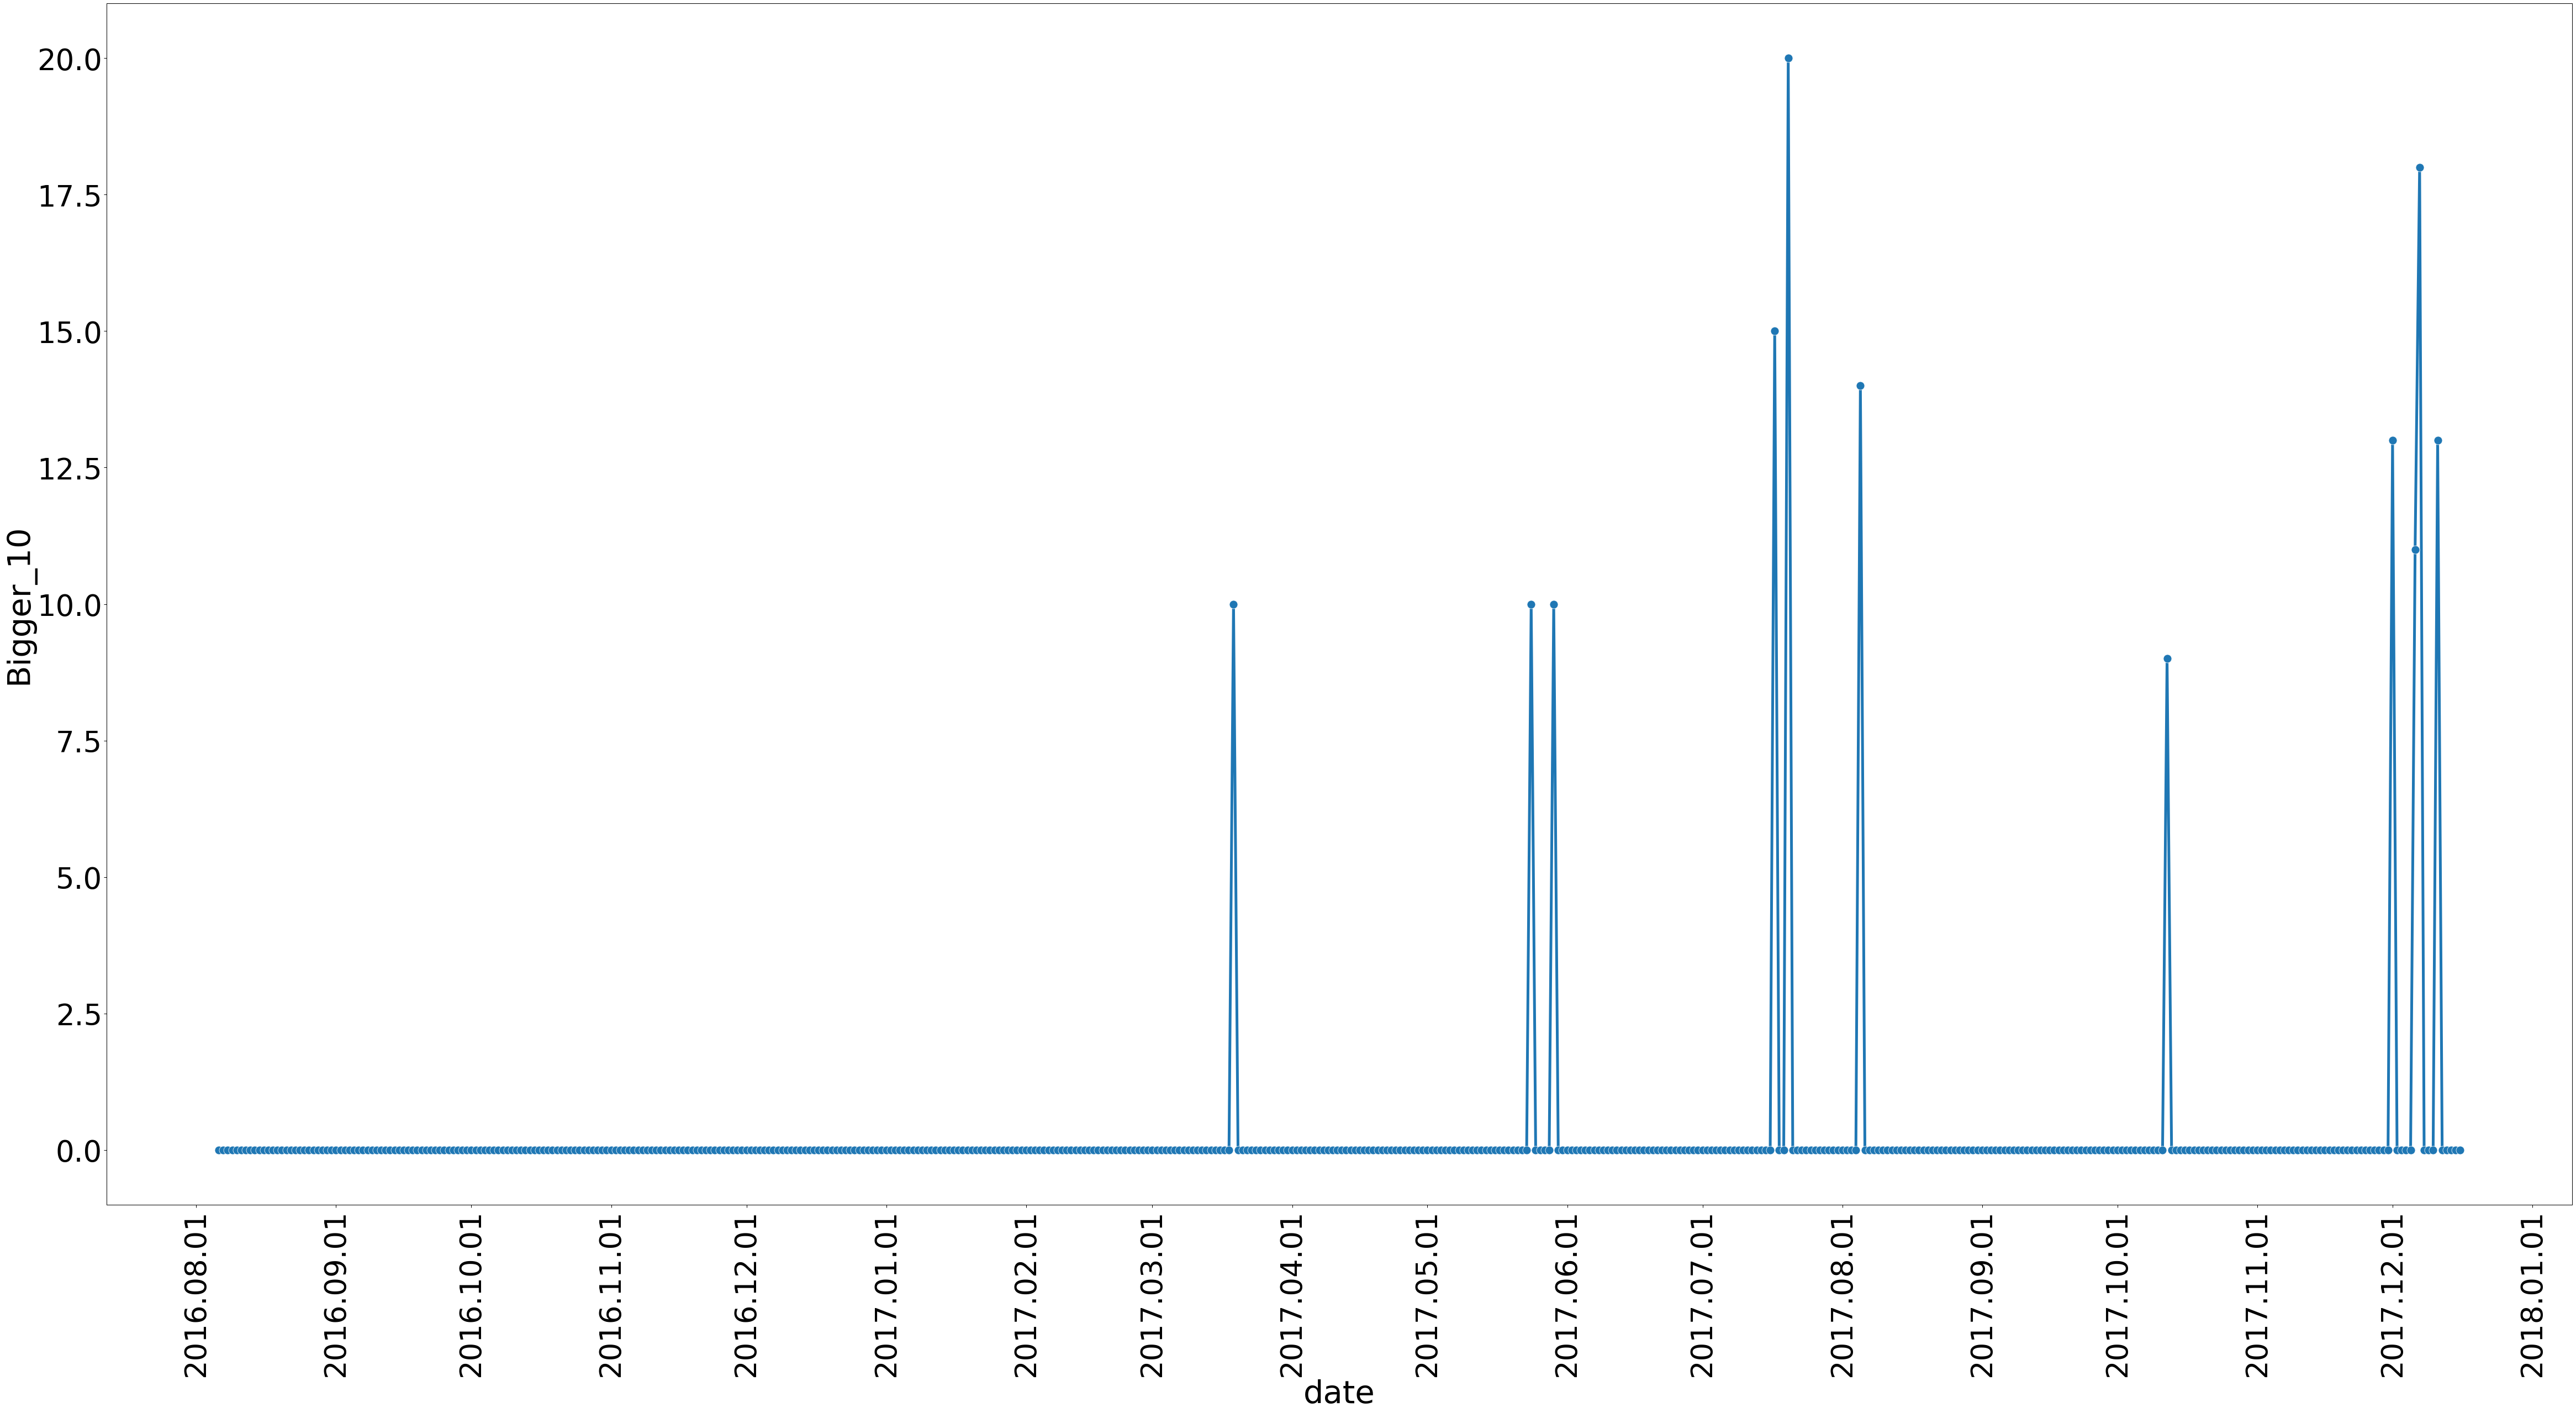

In [21]:
                                   
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 15}                  
sns.set_context("paper", rc = paper_rc , font_scale = 6) 

plt.subplots(figsize=(80,40))
plt.xticks(rotation=90)
line = sns.lineplot(data=secondInc, x=secondInc.index, y="Bigger_10", marker="o")


line.xaxis.set_major_locator(mdates.AutoDateLocator())
line.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
months = mdates.MonthLocator()  # every month
line.xaxis.set_major_locator(months)

lw = line.lines[0].get_linewidth() # lw of first line
plt.setp(line.lines,linewidth=lw)  # set lw for all lines of g axes

# Yeni dataset ile

In [22]:
sayac = 0
thirdInc["Acceleration"] = ""
thirdInc["Acceleration"][0] = 0
thirdInc["Bigger_10"] = 0

for i in range (len(thirdInc["Close"])):
    if sayac == 0:
        pass
        sayac += 1
        thirdInc["Acceleration"][0] = 0 
    else: 
        
        temp_cal = (((thirdInc["Close"][i] / thirdInc["Close"][i - 1]) - 1)*100)                   
        thirdInc["Acceleration"][i] = temp_cal
        
        if temp_cal > 9.9:
            thirdInc["Bigger_10"][i] = temp_cal
        
            
        
thirdInc["Acceleration"] = thirdInc.Acceleration.astype(float)        
      

<ipython-input-22-87f24cd233fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirdInc["Acceleration"][0] = 0
<ipython-input-22-87f24cd233fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirdInc["Acceleration"][0] = 0
<ipython-input-22-87f24cd233fd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirdInc["Acceleration"][i] = temp_cal
<ipython-input-22-87f24cd233fd>:17: SettingWithCopyWarning: 
A value is trying to be set on

[None]

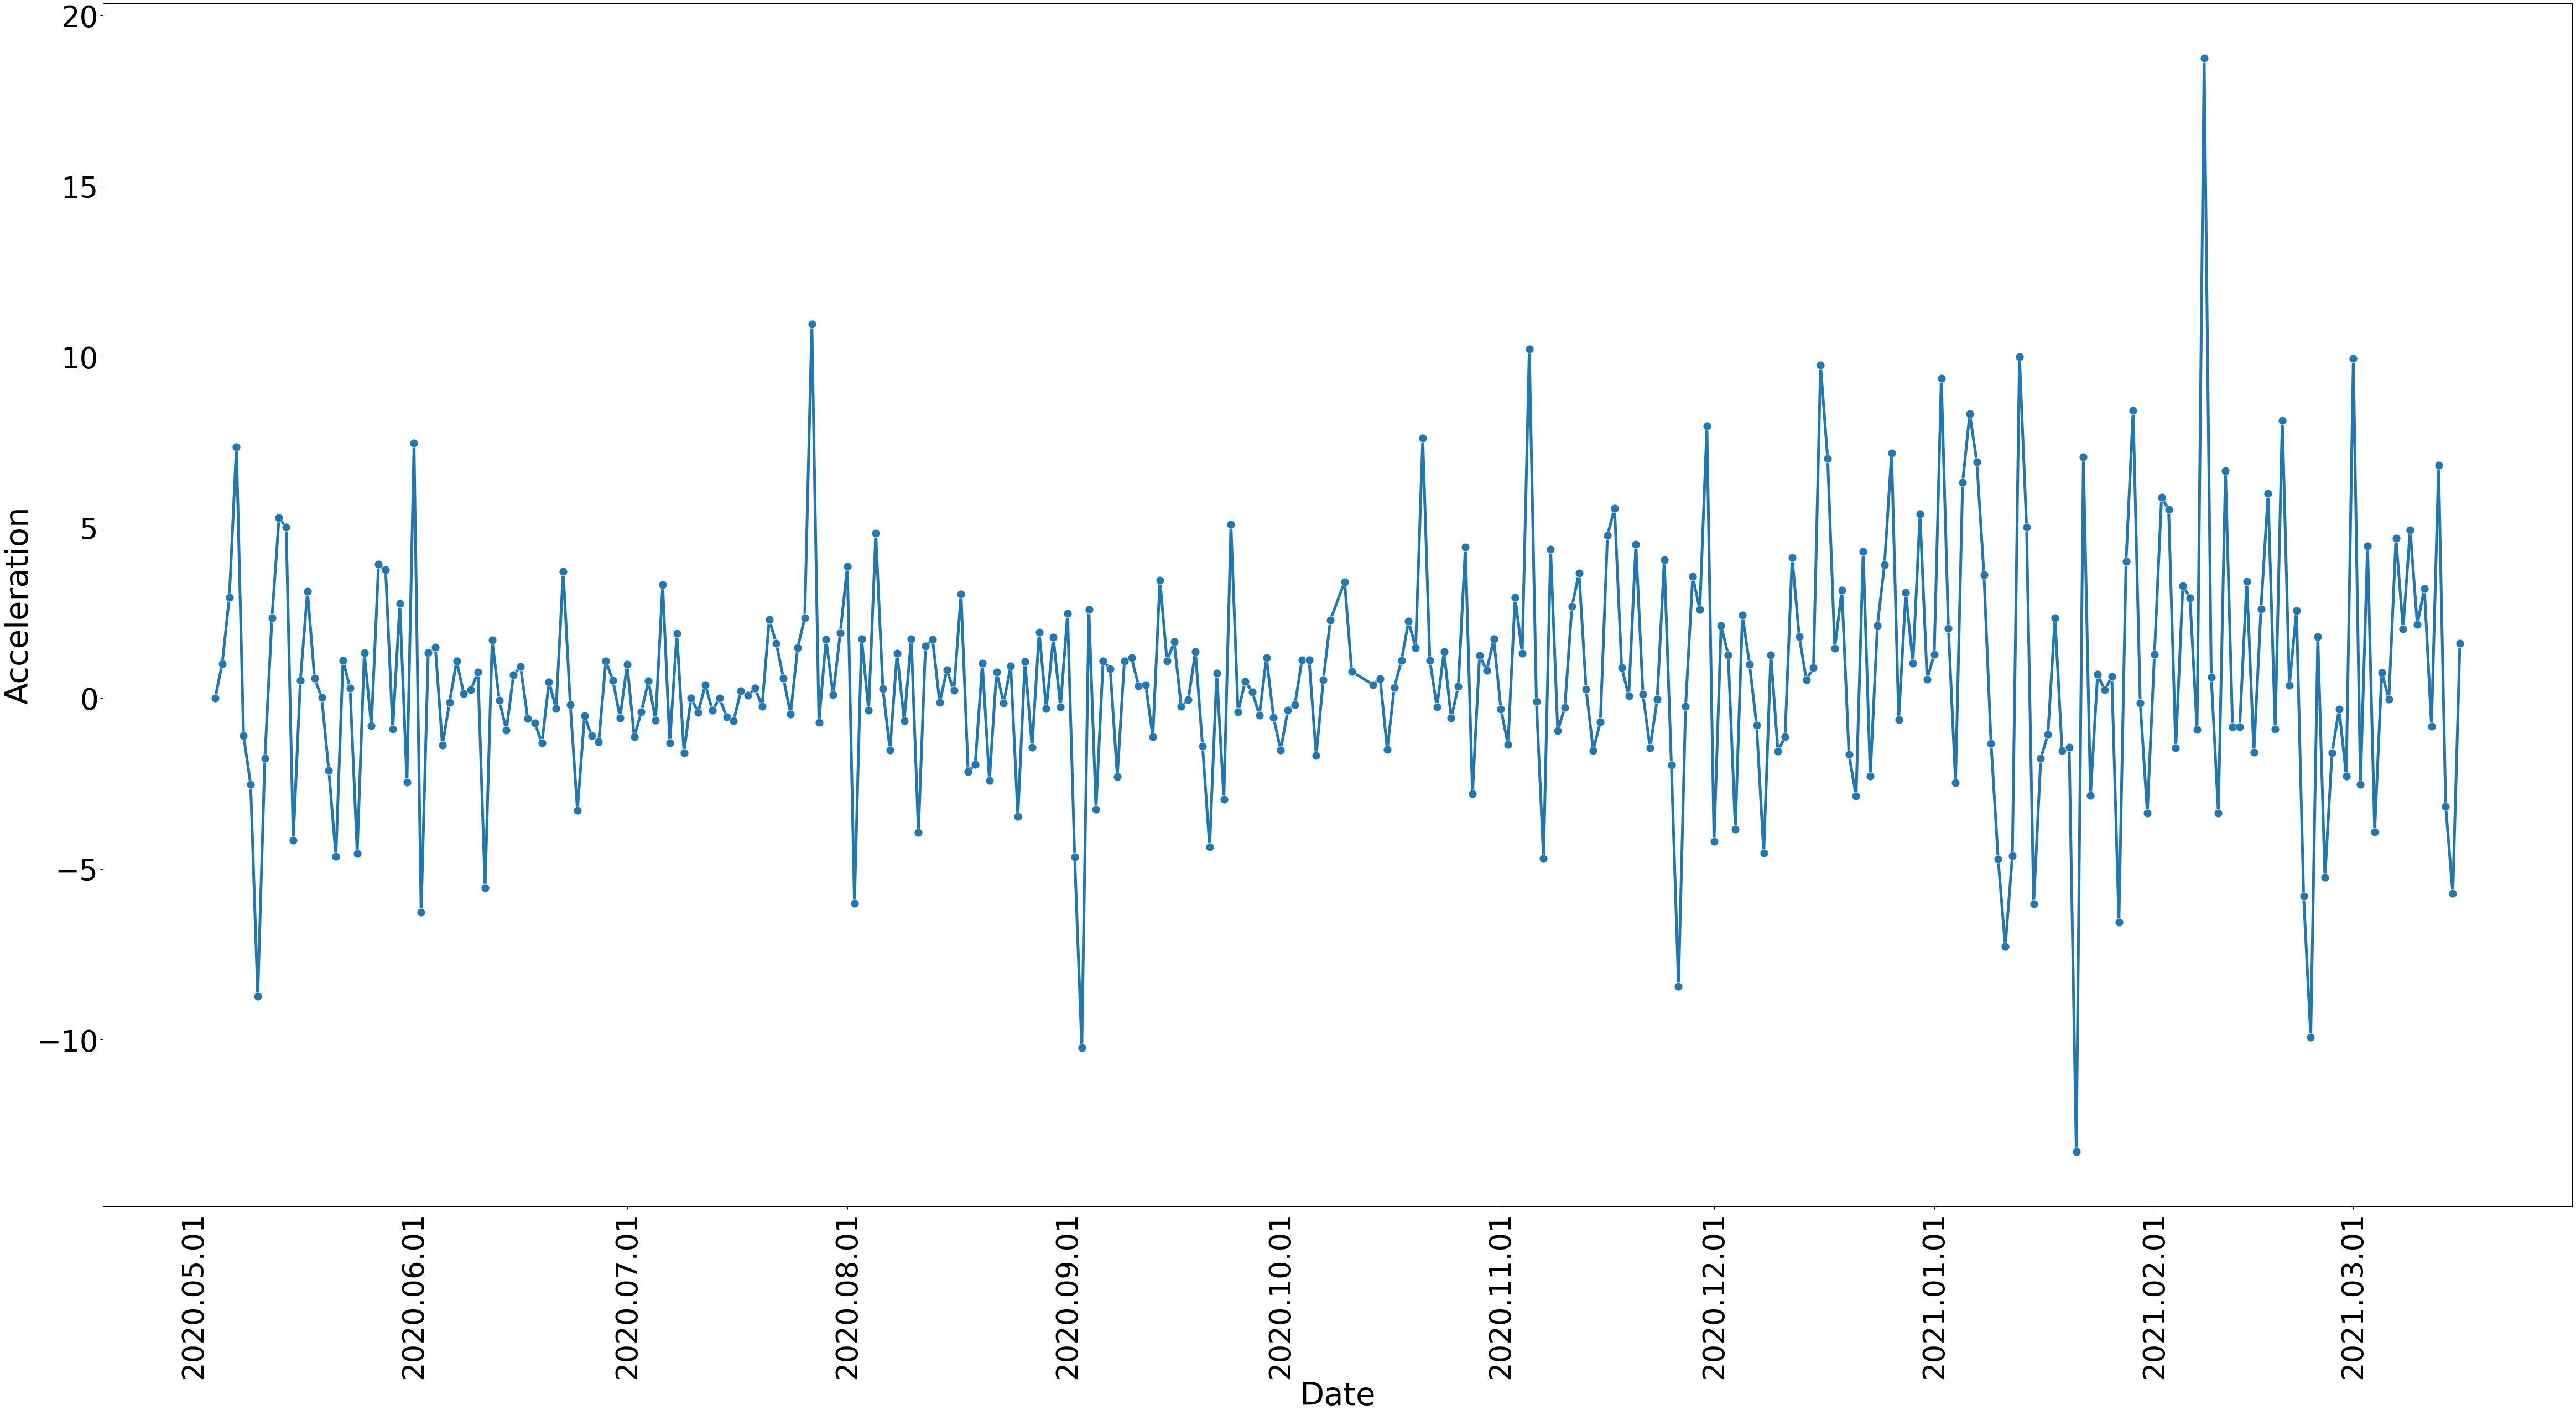

In [23]:
                                   
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 15}                  
sns.set_context("paper", rc = paper_rc , font_scale = 6) 

plt.subplots(figsize=(80,40))
plt.xticks(rotation=90)
line = sns.lineplot(data=thirdInc, x=thirdInc.index, y="Acceleration", marker="o")

line.xaxis.set_major_locator(mdates.AutoDateLocator())
line.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
months = mdates.MonthLocator()  # every month
line.xaxis.set_major_locator(months)

lw = line.lines[0].get_linewidth() # lw of first line
plt.setp(line.lines,linewidth=lw)  # set lw for all lines of g axes

[None]

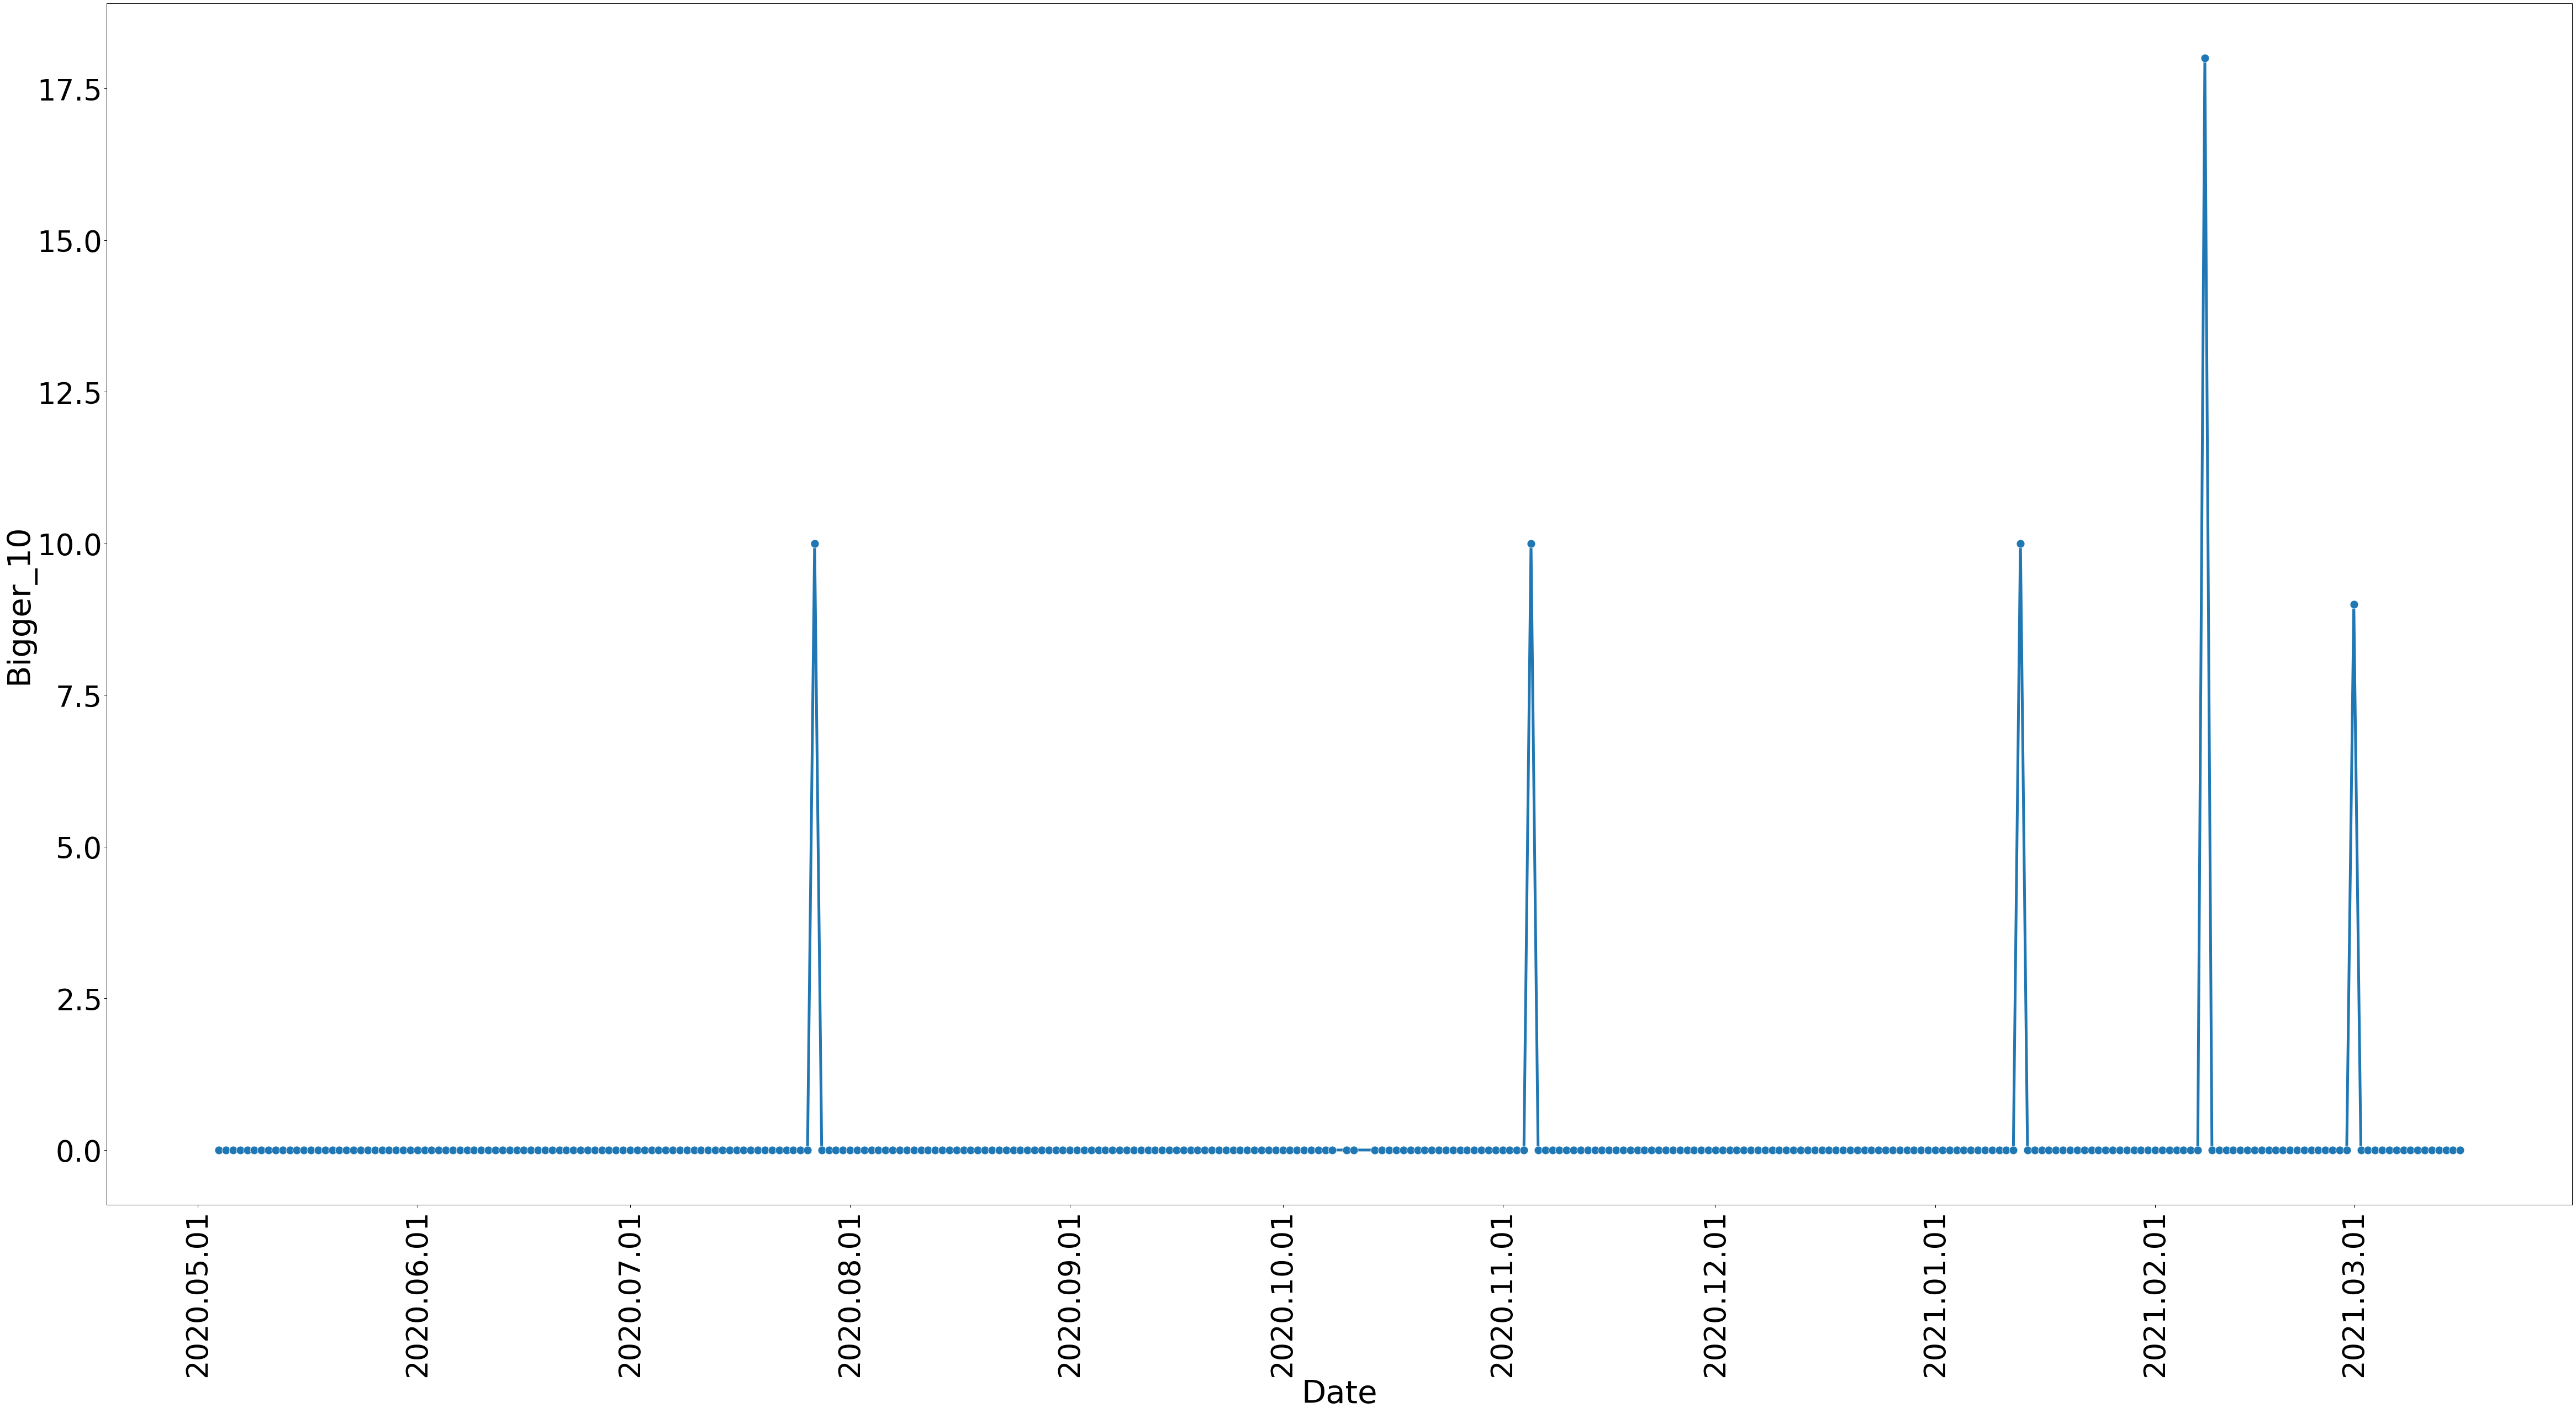

In [24]:
                       
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 15}                  
sns.set_context("paper", rc = paper_rc , font_scale = 6) 

plt.subplots(figsize=(80,40))
plt.xticks(rotation=90)
line = sns.lineplot(data=thirdInc, x=thirdInc.index, y="Bigger_10", marker="o")

line.xaxis.set_major_locator(mdates.AutoDateLocator())
line.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
months = mdates.MonthLocator()  # every month
line.xaxis.set_major_locator(months)

lw = line.lines[0].get_linewidth() # lw of first line
plt.setp(line.lines,linewidth=lw)  # set lw for all lines of g axes


